In [43]:
#!/usr/bin/env python3

import csv
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [145]:
def read_pos(file):
    t = []
    x = []
    y = []
    z = []
    d = [] 
    reader = csv.reader(open(file))
    data = [row for row in reader]
    
    # rosbag開始時刻: ini_t
    ini_t = float(data[1][0])
    
    for row in data[1:]:    
        if row[1] == '':
            continue
        t.append(float(row[0]))
        x.append(float(row[1]))
        y.append(float(row[2]))
        z.append(float(row[3]))
        a = np.sqrt(float(row[1])**2 + float(row[2])**2 + float(row[3])**2)
        d.append(float(a))
    
    for i in range(len(t)):
        t[i] -= ini_t
    
    return x, y, z, d, t

In [85]:
file1_paths = ['./csv_1/0_1.csv.converted.csv', 
              './csv_1/0_2.csv.converted.csv', 
              './csv_1/0_3.csv.converted.csv', 
             './csv_1/1_2.csv.converted.csv', 
             './csv_1/1_3.csv.converted.csv', 
             './csv_1/2_3.csv.converted.csv']

file2_paths = ['./csv_2/0_1.csv.converted.csv', 
              './csv_2/0_2.csv.converted.csv', 
              './csv_2/0_3.csv.converted.csv', 
             './csv_2/1_2.csv.converted.csv', 
             './csv_2/1_3.csv.converted.csv', 
             './csv_2/2_3.csv.converted.csv']

In [138]:
def graph1(file_path, xlim):
    x, y, z, d, t = read_pos(file_path)
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 14), dpi=90)
    print('--------------------')
    for ax, col, data, name in zip(axes.ravel(), 
                                        ['orange','r','b','g'], 
                                        [d,x,y,z], 
                                        ['D','X','Y','Z']):
        lmax = float(t[-1])
        ax.set_title(name)
        ax.plot(t, data, '.', color=col)
        ax.hlines([np.mean(data)], xlim, lmax, col,label='mean')
        ax.set_xlabel('time[s]')
        ax.set_ylabel('distance[m]')
        ax.set_xlim(xlim,t[-1])
        ax.legend()
        print(f"{name}", '&',  
              '{:.03f}'.format(np.mean(data)), 
              '&', '{:.03f}'.format(abs(max(data)) - np.mean(data)), 
              '&', '{:.03f}'.format(np.std(data)))

In [139]:
# graph1(file1_paths[0])

In [140]:
def output1(files, xlim):
    for file, tag in zip(files, ['0_1','0_2','0_3','1_2','1_3','2_3']):
        print(tag,'& \(平均 [m] \) & \偏差 [m] \) & \(標準偏差 \) ', )
        graph1(file, xlim)
        plt.show()

In [146]:
# output1(file1_paths, 500)

In [147]:
# output1(file2_paths,230)

In [125]:
def graph2(file_path, xlim, ylim):
    x, y, z, d, t = read_pos(file_path)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_z = np.mean(z)
    mean_d = np.mean(d)
    lmax = t[-1]
    
    # Plot
    # fig, axes = plt.subplots(2, 2, figsize=(9, 7), dpi=90)
    fig, axes = plt.subplots(figsize=(9, 7), dpi=90)
    
    for col, data, mean, name in zip(['orange','r','b','g'],
                                     [d,x,y,z],
                                     [mean_d,mean_x,mean_y,mean_z],
                                     ['D','x','y','z']):
        plt.plot(t, data-mean, '.', color=col, label=name)
        plt.legend()
        axes.xaxis.set_visible(True)
        axes.set_xlabel('time[s]')
        axes.set_ylabel('Distance[m]')
    plt.hlines([0], 0, lmax, "black")
    axes.set_xlim(xlim,t[-1])
    axes.set_ylim(-ylim,ylim)
    plt.show()

def output2(files, xlim, ylim):
    for file, tag in zip(files, ['0_1','0_2','0_3','1_2','1_3','2_3']):
        print(tag)
        graph2(file, xlim, ylim)
        plt.show()

In [143]:
# output2(file1_paths, 450, 1) # 誤差1mの範囲に注目

In [148]:
# output2(file2_paths, 130, 1)

In [170]:
def read_pos_xy(file):
    x = []
    y = []
    d = []
    t = []
    reader = csv.reader(open(file))
    data = [row for row in reader]
    
    ini_t = float(data[1][0])
    for row in data[1:]:
        if row[1] == '':
            continue
        t.append(float(row[0]))
        x.append(float(row[1]))
        y.append(float(row[2]))
        a = np.sqrt(float(row[1])**2 + float(row[2])**2)
        d.append(float(a))
    
    
    for i in range(len(t)):
        t[i] -= ini_t
    
    return x, y, d, t

In [171]:
# def output_graph_xy(file_path, ylim):
#     x, y, d, t = read_pos_xy(file_path)
    
#     mean_x = np.mean(x)
#     mean_y = np.mean(y)
#     mean_d = np.mean(d)
    
#     # Plot
#     fig, axes = plt.subplots(figsize=(9, 7), dpi=90)
    
#     for ax, col, data, mean, name in zip(axes.ravel(), 
#                                         ['orange','r','b'], 
#                                         [d,x,y],
#                                         [mean_d,mean_x,mean_y],
#                                         ['D*','X*','Y*']):
#         lmax = len(data)
#         ax.set_title(name)
#         ax.set_ylim(-ylim, ylim)
#         ax.axes.xaxis.set_visible(False)
#         ax.plot(data-mean, '.', color=col)
#         ax.hlines([0], 0, lmax, "black")

Tag position Ex1
Distance(0-1)= 5.0093 m
Distance(0-2)= 10.1227 m
Distance(0-3)= 15.1692 m
-------
Tag position Ex2
Distance(0-1)= 4.8557 m
Distance(0-2)= 9.7142 m
Distance(0-3)= 14.6543 m
-------


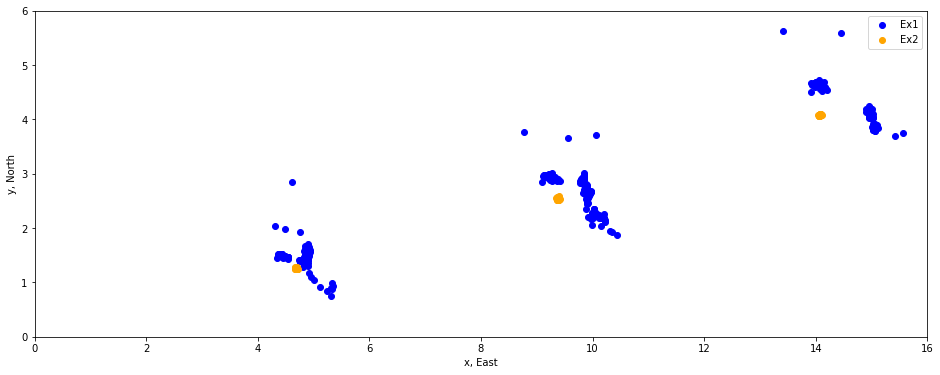

In [173]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)

for file, title, col, label in zip([file1_paths, file2_paths],
                                   ['Tag position Ex1', 'Tag position Ex2'],
                                   ['b','orange'],
                                   ['Ex1', 'Ex2']):
    
    x0_1, y0_1, d0_1, t0_1 = read_pos_xy(file[0])
    x0_2, y0_2, d0_2, t0_2 = read_pos_xy(file[1])
    x0_3, y0_3, d0_3, t0_3 = read_pos_xy(file[2])

    mean_d = [np.mean(d0_1), np.mean(d0_2), np.mean(d0_3)]
    
    print(title)
    print('Distance(0-1)=', '{:.04f}'.format(mean_d[0]),'m')
    print('Distance(0-2)=', '{:.04f}'.format(mean_d[1]),'m')
    print('Distance(0-3)=', '{:.04f}'.format(mean_d[2]),'m')
    print('-------')

    x = x0_1 + x0_2 + x0_3
    y = y0_1 + y0_2 + y0_3
    
    
    ax.set_ylim(0, 6)
    ax.set_xlim(0, 16)
    ax.set_xlabel('x, East')
    ax.set_ylabel('y, North')
    plt.scatter(x, y, color=col,label=label)
    plt.legend()

plt.show()

In [174]:
# EX1を絞る
# 1057-1065で大きくなる
# 1072-1162で小さくなる
def filter_ex1(file):
    x = []
    y = []
    z = []
    d = []
    reader = csv.reader(open(file))
    data = [row for row in reader]

    for row in data[1:1056]:
        if row[1] == '':
            continue
        x1.append(float(row[1]))
        # y.append(float(row[2]))
        # z.append(float(row[3]))
        # a = np.sqrt(float(row[1])**2 + float(row[2])**2 + float(row[3])**2)
        # d.append(float(a))
        
    for row in data[1057:1065]:
        if row[1] == '':
            continue
        x2.append(float(row[1]))
        # y.append(float(row[2]))
        # z.append(float(row[3]))
        # a = np.sqrt(float(row[1])**2 + float(row[2])**2 + float(row[3])**2)
        # d.append(float(a))
        
    for row in data[1066:1072]:
        if row[1] == '':
            continue
        x3.append(float(row[1]))
        # y.append(float(row[2]))
        # z.append(float(row[3]))
        # a = np.sqrt(float(row[1])**2 + float(row[2])**2 + float(row[3])**2)
        # d.append(float(a))
    
    for row in data[1:1056]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        # y.append(float(row[2]))
        # z.append(float(row[3]))
        # a = np.sqrt(float(row[1])**2 + float(row[2])**2 + float(row[3])**2)
        # d.append(float(a))
    return x

In [133]:
x1 = filter_ex1(file1_paths[0])

NameError: name 'x1' is not defined